# **Machine Failure Detection Using Sensor Data**

### __About the Dataset__
This dataset contains sensor data collected from various machines, with the aim of predicting machine failures in advance. It includes a variety of sensor readings as well as the recorded machine failures.

### __Key Attributes of the Cleaned Dataset__
🔹 _Numerical Features_  
- `footfall` - The number of people or objects passing by the machine  
- `USS` – Ultrasonic sensor data, indicating proximity measurements  
- `VOC` – Volatile organic compounds level detected near the machine
- `RP` – Rotational position or RPM (revolutions per minute) of the machine parts
- `Temperature` – The operating temperature of the machine

🔹 _Categorical Features_  
- `fail` - Binary indicator of machine failure (1 for failure, 0 for no failure)

## **A. Dataset Loading**

#### ***Import Libraries***

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

#### ***Load and Explore Dataset***

In [43]:
data = pd.read_csv('failure.csv')

In [44]:
data.head(10)

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
5,110,3,3,4,6,1,21,4,1,0
6,100,7,5,6,4,1,77,4,1,0
7,31,1,5,4,5,4,21,4,1,0
8,180,7,4,6,3,3,31,4,1,0
9,2800,0,3,3,7,0,39,3,1,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


## **B. Preprocessing**

#### ***Data Reduction***

In [46]:
data = data.drop(['tempMode','AQ','CS','IP'], axis=1)

#### ***Get Inputs and Outputs***

🔹 _Independent Variables (X)_  
- `footfall` - The number of people or objects passing by the machine  
- `USS` – Ultrasonic sensor data, indicating proximity measurements  
- `VOC` – Volatile organic compounds level detected near the machine
- `RP` – Rotational position or RPM (revolutions per minute) of the machine parts
- `Temperature` – The operating temperature of the machine

🔹 _Dependent Variable (y)_  
- `fail` - Binary indicator of machine failure (1 for failure, 0 for no failure)

In [47]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [48]:
X

array([[  0,   1,   6,  36,   1],
       [190,   3,   1,  20,   1],
       [ 31,   2,   1,  24,   1],
       ...,
       [  0,   2,   5,  43,  24],
       [  0,   2,   6,  46,  24],
       [ 18,   2,   3,  61,  24]])

In [49]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

#### ***Create the Train Set and the Test Set***

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [51]:
X_train

array([[ 53,   3,   0,  57,  12],
       [ 22,   4,   5,  61,  15],
       [ 55,   2,   0,  41,  21],
       ...,
       [430,   5,   1,  53,  20],
       [  4,   3,   0,  46,  19],
       [ 14,   3,   0,  62,  21]])

In [52]:
X_test

array([[   9,    2,    4,   46,   20],
       [  64,    2,    6,   26,   19],
       [  51,    2,    1,   41,   21],
       [1000,    7,    0,   74,    1],
       [   2,    3,    5,   42,   14],
       [  10,    3,    2,   74,   14],
       [  18,    2,    3,   61,   24],
       [  18,    1,    5,   53,   24],
       [   0,    5,    4,   37,   21],
       [ 180,    2,    0,   39,   17],
       [   4,    2,    0,   84,   18],
       [ 110,    5,    1,   36,   14],
       [  15,    3,    4,   37,   10],
       [   9,    4,    3,   44,   18],
       [ 200,    1,    6,   26,   15],
       [  29,    2,    6,   49,   23],
       [   0,    2,    0,   25,   16],
       [ 100,    5,    1,   30,   10],
       [7300,    2,    5,   50,   23],
       [  16,    2,    4,   65,   20],
       [  42,    3,    0,   32,   23],
       [   8,    4,    1,   32,   15],
       [ 640,    4,    0,   24,   16],
       [ 100,    3,    4,   32,   20],
       [  64,    4,    1,   60,    3],
       [   9,    2,    1,

In [53]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [54]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

#### ***Apply Feature Scaling***

In [55]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [56]:
X_train

array([[-0.2430077 ,  0.02940861, -1.24913701,  0.5847083 , -0.69885414],
       [-0.27077523,  0.74565068,  0.94513577,  0.82610531, -0.2028013 ],
       [-0.24121625, -0.68683345, -1.24913701, -0.38087971,  0.7893044 ],
       ...,
       [ 0.09468128,  1.46189275, -0.81028245,  0.3433113 ,  0.62395345],
       [-0.28689831,  0.02940861, -1.24913701, -0.07913345,  0.4586025 ],
       [-0.27794104,  0.02940861, -1.24913701,  0.88645456,  0.7893044 ]])

## **C. Model Building and Training**

#### ***Build the Model***

In [57]:
model = LogisticRegression(random_state = 0)

#### ***Train the Model***

In [58]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### ***Draw Inferences***

In [59]:
y_pred = model.predict(sc.transform(X_test))

In [60]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Prediction of `fail` using the following values:

1. `footfall` = 15
2. `USS` = 4
3. `VOC` = 1
4. `RP` = 51
5. `Temperature` = 12

In [61]:
pred = model.predict(sc.transform([[15,4,1,51,12]]))

pred_value = int(pred[0])

print(f"fail = {pred_value}")

fail = 0


## **D. Model Evaluation**

#### ***Accuracy***

In [62]:
a = accuracy_score(y_test,y_pred)

print(f"Accuracy = {a*100}%")

Accuracy = 90.47619047619048%


#### ***Confusion Matrix***

In [63]:
cm = confusion_matrix(y_test, y_pred)

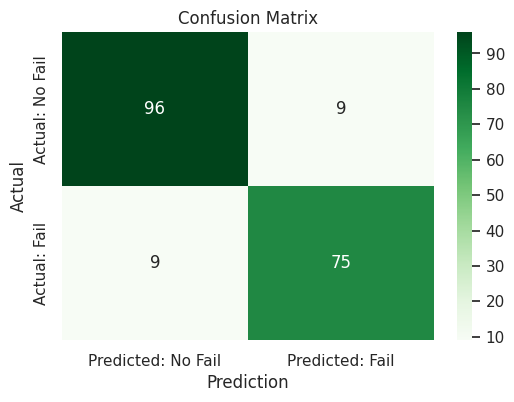

In [64]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Predicted: No Fail', 'Predicted: Fail'],
            yticklabels=['Actual: No Fail', 'Actual: Fail'])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### ***Precision, Recall, F1-score***

In [65]:
report = classification_report(y_test, y_pred, output_dict=True)

report = pd.DataFrame(report).transpose()

report

,precision,recall,f1-score,support
0,0.914286,0.914286,0.914286,105.000000
1,0.892857,0.892857,0.892857,84.000000
accuracy,0.904762,0.904762,0.904762,0.904762
macro avg,0.903571,0.903571,0.903571,189.000000
weighted avg,0.904762,0.904762,0.904762,189.000000


#### ***ROC Curve***

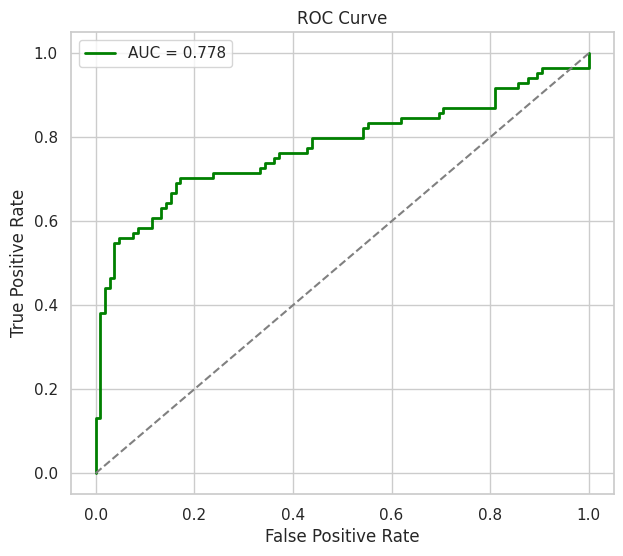

In [66]:
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='green', linewidth=2, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


## **Visualizations**

#### ***Correlation Heatmap***

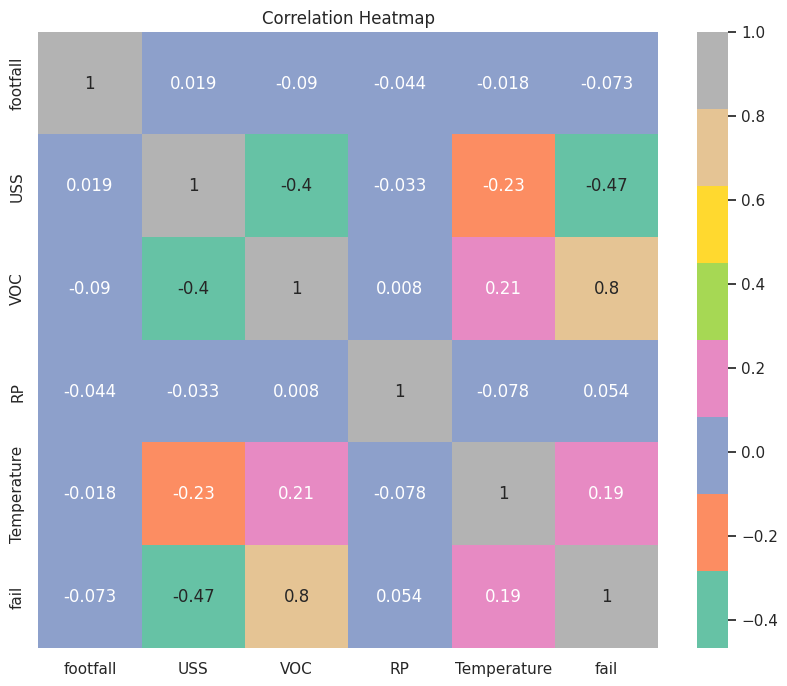

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='Set2')
plt.title("Correlation Heatmap")
plt.show()

#### ***Violin Plot***

/tmp/ipython-input-869425478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fail', y=feature, data=data, palette='Set2')
/tmp/ipython-input-869425478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fail', y=feature, data=data, palette='Set2')
/tmp/ipython-input-869425478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fail', y=feature, data=data, palette='Set2')
/tmp/ipython-input-869425478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

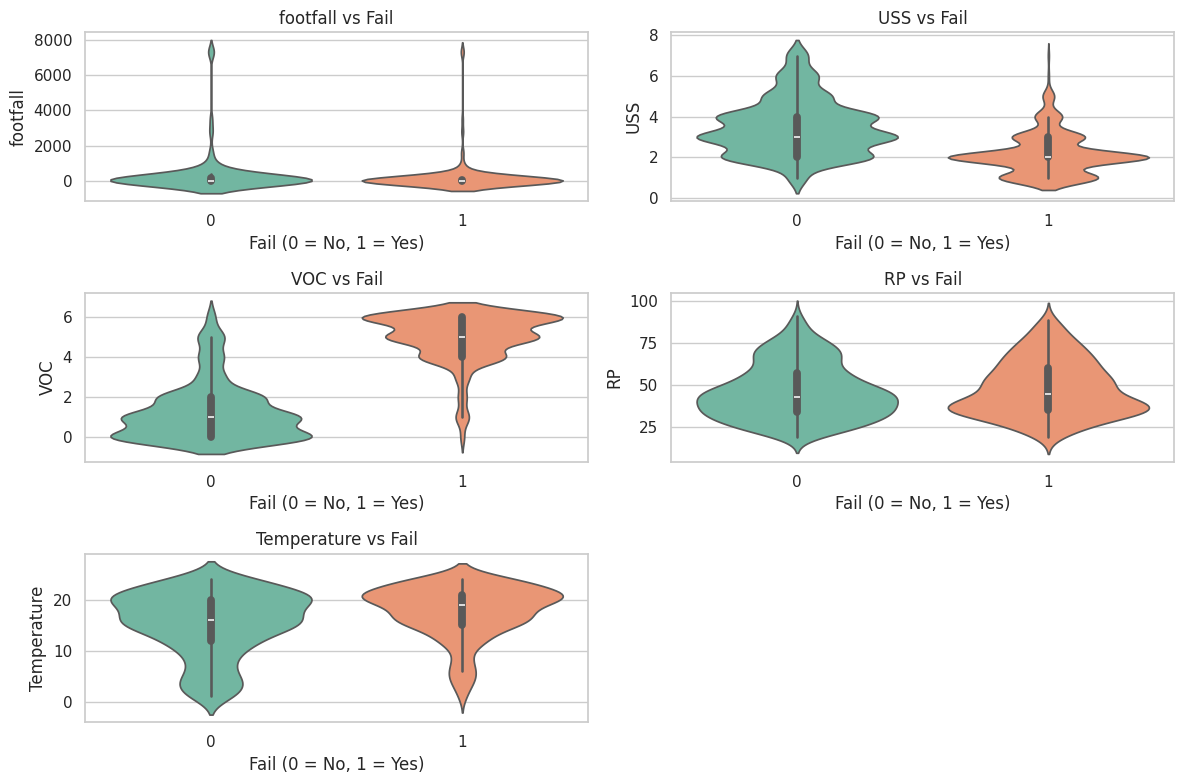

In [68]:
sns.set(style="whitegrid")

features = ['footfall', 'USS', 'VOC', 'RP', 'Temperature']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(x='fail', y=feature, data=data, palette='Set2')
    plt.title(f'{feature} vs Fail')
    plt.xlabel('Fail (0 = No, 1 = Yes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


## **E. Insights**


1.   This model shows high accuracy, precision, recall, and f-1 score, ranging from 0.89 to 0.92, exhibiting a strong model performance for detecting whether the machine will experience failure or non-failure in different cases/variables.
2.   The model performs well overall, with about 90% accuracy and balanced detection of both failure and non‑failure cases. It shows no major bias between classes, and the AUC of 0.778 indicates it can reliably distinguish failing from non‑failing machines.
3.   Among all the features, VOC shows the strongest relationship with machine failure, making it a reliable indicator of potential malfunction. In contrast, footfall and USS exhibit weak associations with failure and are less useful for predicting machine issues.
4.   Results of continuous monitoring the variables are essential for early failure detection that can be integrated with preventive mainenance workflows to avoid machine breakdowns.
5.   For further improvements, the accuracy and precision of the model can be boosted by collecting more sensor data.

